In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime as dt
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr

#Ref:https://pypi.org/project/yfinance/
#https://www.investopedia.com/terms/m/montecarlosimulation.asp

In [2]:
ticker = "TSLA"
years = 5
end_date = dt.date.today()
start_date = end_date - relativedelta(years=years)

hist = yf.Ticker(ticker).history(period=f'{years}y')[['Close']]
days = [i for i in range(1, len(hist['Close'])+1)]
hist_prices = hist['Close'].tolist()

ending_price = []
profit = []

#model input 
log_returns = np.log(1 + hist.pct_change()) 

mean = log_returns.mean() #gornja varijabla log_returns, njena srednja vrijednost
var = log_returns.var()
Z = mean - (var * 0.5)
std_dev = log_returns.std()
montecarlo_days = 252 #one year of trading days
simulations = 100

#https://lucaslouca.com/Why-Use-Logarithmic-Returns-In-Time-Series-Modelling/
#za izracun se rade, kao kamate na kredit kad se racuna povrat investicije, sl.
#https://lucaslouca.com/Why-Use-Logarithmic-Returns-In-Time-Series-Modelling/
#za izracun rade, kao kamate na kredit kad se racuna povrat investicije, sl.
#investopedia: z je drift ; Drift=Average Daily Return−(Variance/2)
#krecemo ne od nultog nego prvog, minus 1 dan radi razlike, neparni prvi(nulti), nemamo koga oduzet od njega

In [3]:
# histclose = hist['Close'].iloc[-1]
# histclose
# (svaka prosla cijena, za usproedbu jel close raste ili pada, dole u loopu

In [4]:
len(hist_prices)

1259

In [5]:
len(days)

1259

In [6]:
day_num = np.arange(days[-1],days[-1]+montecarlo_days)
day_num

#uzimamo povijesni broj dana, prvi od straga,tj zadnju vrijednost koju imamo
#uvik se to oduzima i broj dana simulacije, 252
#inače iz ispisa dole se vidi 1510- 1259 je 251, a broj dana simulacije je 252, one y of trading
#za 1 manje ukupni broj jer ovaj gore oduzeli

array([1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269,
       1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280,
       1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291,
       1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302,
       1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313,
       1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324,
       1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335,
       1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346,
       1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357,
       1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368,
       1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379,
       1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390,
       1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401,
       1402, 1403, 1404, 1405, 1406, 1407, 1408, 14

In [7]:
montecarlo_days

252

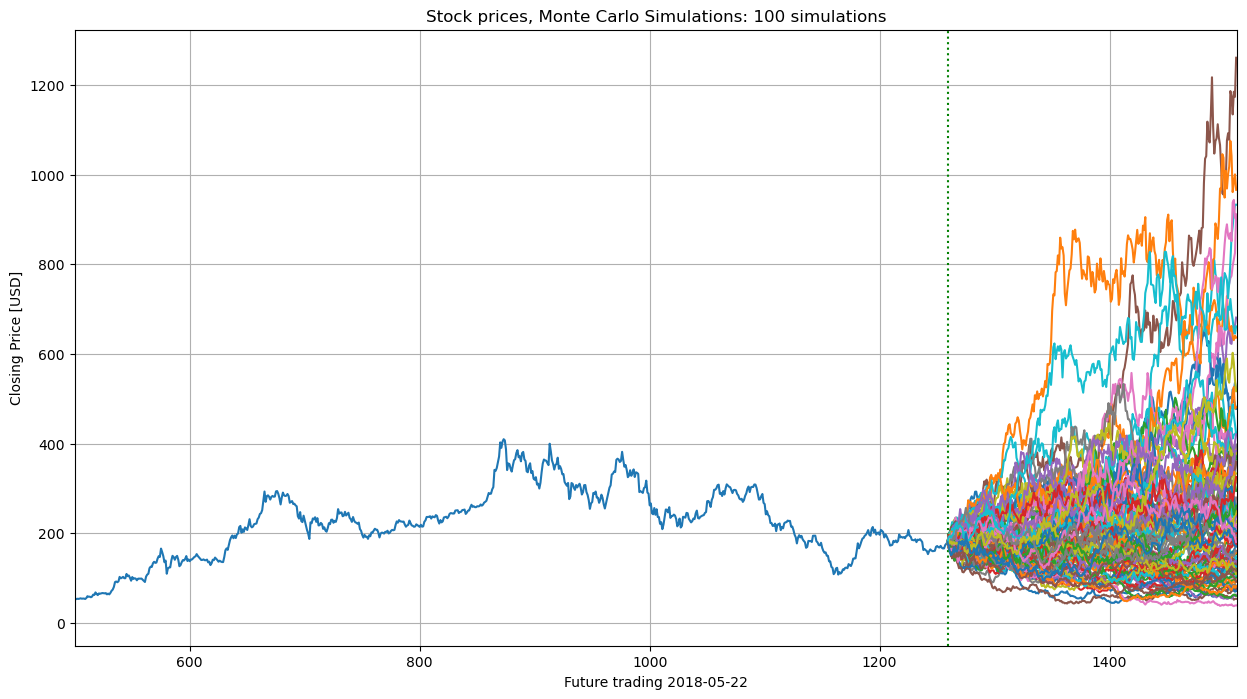

In [8]:
# plot for simulation
fig = plt.figure(figsize=[15, 8])
plt.plot(days, hist_prices)
plt.title("Stock prices, Monte Carlo Simulations: " + str(simulations) +" simulations")
plt.xlabel("Future trading " + str(start_date))
plt.ylabel("Closing Price [USD]")
plt.axvline(x=days[-1], label='Current date', color='green', ls=':')
plt.xlim([500, len(days)+ montecarlo_days]) #SMANJIT OVAJ LIMit
plt.grid()


#fuiture values  
for i in range(simulations):
    day_num = np.arange(days[-1],days[-1]+montecarlo_days) #today plus number of days to predict
    montecarlo_returns = np.exp(Z.values + std_dev.values * norm.ppf(np.random.rand(montecarlo_days)))
    #drift+random value iz investopedije, a e na to ide, zato np.ecp( to je e) na to 
    #https://www.investopedia.com/terms/m/montecarlosimulation.asp
     
    histclose = hist['Close'].iloc[-1]
    montecarlo_prices = np.zeros_like(montecarlo_returns)
    #numpy method returns an array of given shape and type as given array, with zeros.
    montecarlo_prices[0] = histclose
 ##takes fist item from the numpy zeors array, which then becomes e^3(Drift+Random Value) lower, here returns
    for t in range(1, montecarlo_days):
        montecarlo_prices[t] =  montecarlo_prices[t - 1] * montecarlo_returns[t]
        #next day prices=todays prices*e^3(Drift+Random Value) lower, here returns        
#plot future values  #INDENT ti je vazan, ide na svih  
    plt.plot(day_num, montecarlo_prices)
#check the difference between closing and historic price closing, if higher;profitable    
    ending_price.append(montecarlo_prices[-1])
    if montecarlo_prices[-1] > histclose:
        profit.append(1)
    else:
        profit.append(0)

#https://www.geeksforgeeks.org/numpy-zeros_like-python/        
#https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf
#https://stackoverflow.com/questions/31951980/what-exactly-does-numpy-exp-do
#https://realpython.com/how-to-use-numpy-arange/
#https://lucaslouca.com/Why-Use-Logarithmic-Returns-In-Time-Series-Modelling/
#lines : crta prijelaza
# The expression norm.ppf(np.random.rand(10, 2))
# generates random samples from the standard normal distribution, using the inverse transform method
# https://stackoverflow.com/questions/59789694/shouldnt-norm-ppf-method-only-give-positive-output
# https://en.wikipedia.org/wiki/Inverse_transform_sampling
# https://en.wikipedia.org/wiki/Inverse_transform_sampling
#price of a day, python needs index fo every predicted day on c axis (inverse transform), montecarlo_days

In [9]:
#show some summary statistics 
pct_profit = round(100 * (sum(profit) / simulations), 2)
avg_ending = round(sum(ending_price)/simulations, 2)
avg_pct_change = round(100 * ((avg_ending - histclose) / histclose), 2)
print(f'Average simulated ending price: ${avg_ending}')
print(f'Average percent increase: {avg_pct_change}%')
print(f'Percent of simulated ending prices > current day price: {pct_profit}%')

Average simulated ending price: $268.09
Average percent increase: 48.82%
Percent of simulated ending prices > current day price: 58.0%
